In [45]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

/usr/local/bin/orca: Text file busy
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgtk2.0-0 is already the newest version (2.24.33-2ubuntu2).
libgconf-2-4 is already the newest version (3.2.6-7ubuntu2).
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.8).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [46]:
!wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"

--2024-02-27 22:41:25--  https://archive.org/download/ages-and-heights/AgesAndHeights.pkl
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl [following]
--2024-02-27 22:41:25--  https://ia801802.us.archive.org/31/items/ages-and-heights/AgesAndHeights.pkl
Resolving ia801802.us.archive.org (ia801802.us.archive.org)... 207.241.230.172
Connecting to ia801802.us.archive.org (ia801802.us.archive.org)|207.241.230.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2406 (2.3K) [application/octet-stream]
Saving to: ‘AgesAndHeights.pkl.1’

AgesAndHeights.pkl. 100%[===================>]   2.35K  --.-KB/s    in 0s      

2024-02-27 22:41:25 (792 MB/s) - ‘AgesAndHeights.pkl.1’ saved [2406/2406]



In [47]:
data = pd.read_pickle("AgesAndHeights.pkl")
data.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


<Axes: >

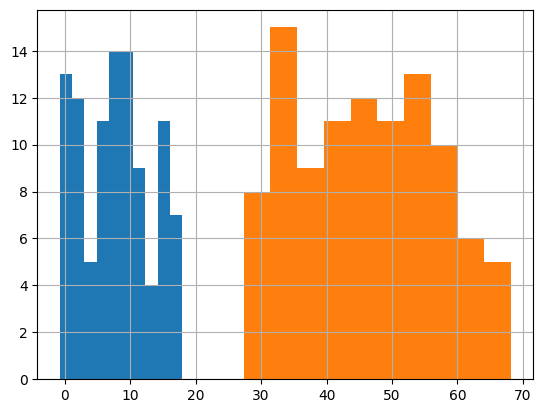

In [48]:
ages = data['Age']
heights = data['Height']

ages.hist()
heights.hist()

In [49]:
data = data[ages > 0]
ages = data['Age']
heights = data['Height']
data.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

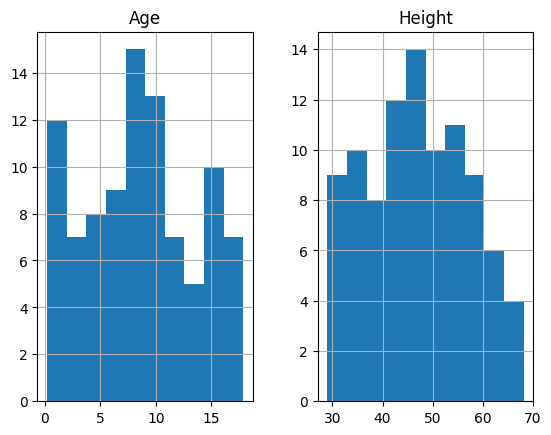

In [50]:
data.hist()

<Axes: xlabel='Age', ylabel='Height'>

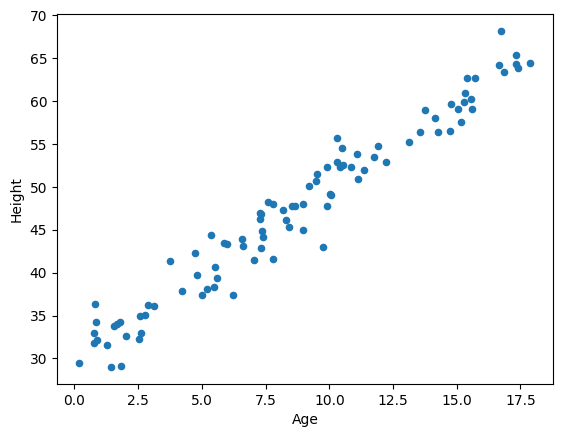

In [51]:
data.plot.scatter(x='Age', y='Height')

In [52]:
fig = px.scatter(x=ages, y=heights, title="Height vs Age of People", labels={'x': 'Age (years)',
                                                                             'y': 'Height (inches)'})
fig.show()

In [53]:
ages_np = ages.to_numpy()
heights_np = heights.to_numpy()

ages_np, heights_np

(array([14.76787382,  3.10767135,  7.26691701,  1.81517968, 16.75375763,
         5.35126307,  8.65571488,  4.20599293,  7.35669106,  1.66817819,
         8.2969588 , 14.74948482, 15.28545214, 16.65534197,  0.85918789,
         8.43332999, 11.92386163,  0.76828323, 11.36202254,  1.29597926,
        10.31206094, 17.39335272, 10.31003056,  6.23764582, 15.55153122,
         2.77346425, 15.59798962,  7.57789784,  2.04165705,  9.90665221,
         2.87252515,  1.54231936,  5.46202264, 15.04362695,  5.99372597,
         4.805291  ,  8.94992003,  5.02020985,  9.89555258,  5.20281507,
         0.19568558,  0.89217393,  7.30979593, 10.8545723 , 15.69876495,
         0.81216582, 15.40144747,  9.21599924,  8.98515379,  3.74369906,
         0.75192511,  6.5963469 ,  9.75112683,  7.40094567, 17.32712575,
        10.53406938, 15.16816596,  9.46971876, 13.54691548,  7.80132294,
         2.51910344,  4.71666526, 10.0386595 , 11.77125476,  8.53738026,
         2.58355771,  1.438003  , 10.40642157, 16.8

In [54]:
ages_np.shape, heights_np.shape

((93,), (93,))

In [55]:
ages_np_reshaped = ages_np.reshape(len(ages), 1)
ages_np_reshaped

array([[14.76787382],
       [ 3.10767135],
       [ 7.26691701],
       [ 1.81517968],
       [16.75375763],
       [ 5.35126307],
       [ 8.65571488],
       [ 4.20599293],
       [ 7.35669106],
       [ 1.66817819],
       [ 8.2969588 ],
       [14.74948482],
       [15.28545214],
       [16.65534197],
       [ 0.85918789],
       [ 8.43332999],
       [11.92386163],
       [ 0.76828323],
       [11.36202254],
       [ 1.29597926],
       [10.31206094],
       [17.39335272],
       [10.31003056],
       [ 6.23764582],
       [15.55153122],
       [ 2.77346425],
       [15.59798962],
       [ 7.57789784],
       [ 2.04165705],
       [ 9.90665221],
       [ 2.87252515],
       [ 1.54231936],
       [ 5.46202264],
       [15.04362695],
       [ 5.99372597],
       [ 4.805291  ],
       [ 8.94992003],
       [ 5.02020985],
       [ 9.89555258],
       [ 5.20281507],
       [ 0.19568558],
       [ 0.89217393],
       [ 7.30979593],
       [10.8545723 ],
       [15.69876495],
       [ 0

In [56]:
model = LinearRegression().fit(ages_np_reshaped, heights_np)
model.coef_

array([2.0014169])

In [57]:
x_new = np.array(list(range(19))).reshape(19, 1)
preds = model.predict(x_new)

fig = px.scatter(x=ages, y=heights, title="Height vs Age of People", labels={'x': 'Age (years)',
                                                                             'y': 'Height (inches)'})
fig.add_trace(go.Scatter(x=x_new.reshape(19), y=preds, mode='lines', name='Model'))
fig.write_image("base.svg", width=800)
fig.show()

In [58]:
from joblib import dump, load

In [59]:
dump(model, 'model.joblib')

['model.joblib']

In [60]:
loaded_model = load('model.joblib')

In [61]:
more_preds  = loaded_model.predict(x_new)
more_preds

array([29.96185761, 31.96327451, 33.96469141, 35.96610831, 37.96752521,
       39.96894211, 41.97035901, 43.97177591, 45.97319281, 47.9746097 ,
       49.9760266 , 51.9774435 , 53.9788604 , 55.9802773 , 57.9816942 ,
       59.9831111 , 61.984528  , 63.9859449 , 65.9873618 ])

In [62]:
def make_picture(training_data_filename, model, new_input_numpy_array, output_file):
  data = pd.read_pickle(training_data_filename)
  ages = data['Age']
  data = data[ages > 0]
  ages = data['Age']
  heights = data['Height']
  x_new = np.array(list(range(19))).reshape(19, 1)
  preds = model.predict(x_new)
  fig = px.scatter(x=ages, y=heights, title="Height vs Age of People", labels={'x': 'Age (years)',
                                                                             'y': 'Height (inches)'})
  fig.add_trace(go.Scatter(x=x_new.reshape(19), y=preds, mode='lines', name='Model'))
  new_predictions = model.predict(new_input_numpy_array)
  fig.add_trace(go.Scatter(x=new_input_numpy_array.reshape(len(new_input_numpy_array)), y=new_predictions, name='New Outputs', mode='markers', marker=dict(color='purple', size=20, line=dict(color='purple', width=2))))
  fig.write_image(output_file, width=800)

  fig.show()

In [63]:
make_picture("AgesAndHeights.pkl", model, floats_strings_to_np_array("1,3.2,"), "plot.svg")

In [64]:
def is_float(value):
  try:
    float(value)
    return True
  except:
    return False

In [65]:
def floats_strings_to_np_array(floats_string):
  floats = np.array([float(x) for x in floats_string.split(',') if is_float(x)])
  return floats.reshape(len(floats), 1)